In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_winner = pd.read_csv('match_winner_data_version1.csv')
df_loser = pd.read_csv('match_loser_data_version1.csv')

In [3]:
df = pd.concat([df_winner, df_loser], axis=0)

In [4]:
df

,Unnamed: 0,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,bans,gameId
0,0,200,Win,False,True,True,False,True,True,9,1,0,3,0,2,0,"[{'championId': 523, 'pickTurn': 6}, {'champio...",4.247263e+09
1,1,100,Win,False,False,False,False,True,True,4,0,0,2,0,2,0,"[{'championId': 523, 'pickTurn': 1}, {'champio...",4.247156e+09
2,2,200,Win,True,True,True,False,True,True,5,1,0,2,0,2,0,"[{'championId': 350, 'pickTurn': 6}, {'champio...",4.243963e+09
3,3,200,Win,True,True,False,False,False,True,6,0,1,3,0,1,0,"[{'championId': 81, 'pickTurn': 6}, {'champion...",4.241678e+09
4,4,100,Win,True,True,True,True,True,True,11,3,2,2,0,2,0,"[{'championId': 30, 'pickTurn': 1}, {'champion...",4.241539e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108824,108824,200,Fail,True,False,False,False,False,False,3,0,0,1,0,0,0,[],4.088497e+09
108825,108825,200,Fail,False,True,False,False,True,True,3,0,0,2,0,2,0,"[{'championId': 84, 'pickTurn': 6}, {'champion...",4.130964e+09
108826,108826,200,Fail,True,True,True,False,True,True,6,1,0,3,0,1,0,"[{'championId': 107, 'pickTurn': 6}, {'champio...",4.119954e+09
108827,108827,200,Fail,False,False,False,True,True,False,5,0,1,3,0,0,0,[],4.130440e+09


In [5]:
df = df.drop(['Unnamed: 0', 'teamId', 'vilemawKills', 'dominionVictoryScore', 'bans', 'gameId'], axis=1)
df

,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,riftHeraldKills
0,Win,False,True,True,False,True,True,9,1,0,3,2
1,Win,False,False,False,False,True,True,4,0,0,2,2
2,Win,True,True,True,False,True,True,5,1,0,2,2
3,Win,True,True,False,False,False,True,6,0,1,3,1
4,Win,True,True,True,True,True,True,11,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
108824,Fail,True,False,False,False,False,False,3,0,0,1,0
108825,Fail,False,True,False,False,True,True,3,0,0,2,2
108826,Fail,True,True,True,False,True,True,6,1,0,3,1
108827,Fail,False,False,False,True,True,False,5,0,1,3,0


In [6]:
df.groupby('win').mean()

,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,riftHeraldKills
win,,,,,,,,,,,
Fail,0.395554,0.262477,0.066525,0.080713,0.298942,0.274957,1.854223,0.136137,0.109147,0.817198,0.383405
Win,0.602321,0.725239,0.694962,0.394224,0.559704,0.518823,6.659999,1.179805,0.491156,1.952503,0.811401


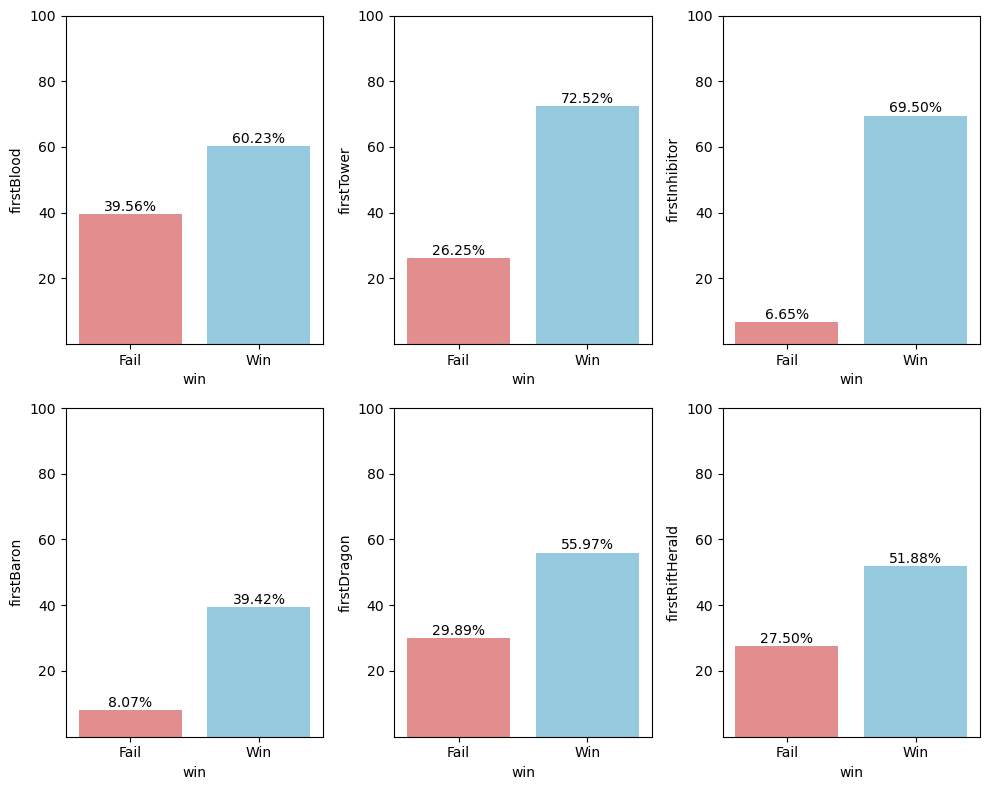

In [7]:
fig, axes = plt.subplots(2,3, figsize=(10, 8))

sns.barplot(data = df.groupby('win').mean().reset_index(), x='win', y='firstBlood', palette=['lightcoral', 'skyblue'], ax=axes[0,0])   
axes[0,0].set_yticks([0.2, 0.4, 0.6, 0.8, 1.0], [20, 40, 60, 80, 100])
sns.barplot(data = df.groupby('win').mean().reset_index(), x='win', y='firstTower', palette=['lightcoral', 'skyblue'], ax=axes[0,1])
axes[0,1].set_yticks([0.2, 0.4, 0.6, 0.8, 1.0], [20, 40, 60, 80, 100])
sns.barplot(data = df.groupby('win').mean().reset_index(), x='win', y='firstInhibitor', palette=['lightcoral', 'skyblue'], ax=axes[0,2])
axes[0,2].set_yticks([0.2, 0.4, 0.6, 0.8, 1.0], [20, 40, 60, 80, 100])
sns.barplot(data = df.groupby('win').mean().reset_index(), x='win', y='firstBaron', palette=['lightcoral', 'skyblue'], ax=axes[1,0])
axes[1,0].set_yticks([0.2, 0.4, 0.6, 0.8, 1.0], [20, 40, 60, 80, 100])
sns.barplot(data = df.groupby('win').mean().reset_index(), x='win', y='firstDragon', palette=['lightcoral', 'skyblue'], ax=axes[1,1])
axes[1,1].set_yticks([0.2, 0.4, 0.6, 0.8, 1.0], [20, 40, 60, 80, 100])
sns.barplot(data = df.groupby('win').mean().reset_index(), x='win', y='firstRiftHerald', palette=['lightcoral', 'skyblue'], ax=axes[1,2])
axes[1,2].set_yticks([0.2, 0.4, 0.6, 0.8, 1.0], [20, 40, 60, 80, 100])


for ax in axes.flat:
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2,
                p.get_y() + p.get_height()+0.01,
                f'{p.get_height()*100:.2f}%',
                ha='center')
        

plt.tight_layout()
plt.show()

첫 킬을 기록한 팀의 승률은 <span style='color:blue'>60%</span>이고 패배한 경우는 <span style='color:red'>40%</span>로 다른 기록들에 비해 크게 차이는 나지 않지만 확실히 첫 킬을 기록한 팀은 승리가 많은걸 볼 수 있다</br>

첫 타워를 부신 팀의 승률은 <span style='color:blue'>73%</span>에 달하는걸 볼 수 있다 다른 기록들에 비해 가장 높은 승률을 보이고 있다 하지만 첫 타워를 깨고 지는 경우도 <span style='color:red'>26%</span>정도로 충분히 역전이 가능한 수치인걸 볼 수 있다.</br>

첫 억제기를 부신 팀의 승률은 <span style='color:blue'>70%</span>에 달하고 첫 억제기를 부시고 진팀은 <span style='color:red'>7%</span>에 달하기 때문에 첫 억제기를 부신다면 이길 확률은 가장 높지는 않지만 역전이 될 확률까지 생각하면 첫 억제기를 깨는 팀이 가장 게임에서 유리한걸 볼 수 있다.</br>

첫 바론을 가져가는 팀의 승률은 <span style='color:blue'>39%</span> 패배는 <span style='color:red'>8%</span>정도로 첫 바론을 가져가고 지는 확률은 억제기 와 비슷하게 매우 낮다고 볼 수 있다.</br>
(첫 바론을 먹고 39%에 승률중에 바론없이 게임 끝난 게임들도 있기 때문에 저렇게 낮게 나온걸 알 수 있음)</br>

첫 용을 가져간 팀의 승률은 <span style='color:blue'>56%</span> 패배는 <span style='color:red'>30%</span>로 본인의 생각보다 첫 용의 지표가 정령 보다 높은건 의외에 결과이다. 첫 용을 가져간다는건 미드라인과 바텀라인의 주도권을 가지고 있기 때문이라고 생각한다 주도권을 가지고 계속 게임을 유리하게 굴릴수 있다 보니 이러한 결과가 나왔다 생각함.</br>

첫 정령을 가져간팀의 승률은 <span style='color:blue'>52%</span> 패배는 <span style='color:red'>28%</span>가 나왔다. 본인은 용보다 정령을 더 중요하게 생각했지만 통계를 보면 정령보다 용의 승률이 높음 하지만통계에서 승률이 가장높은건 첫 포탑을 깨는것이기 때문에 정령을 잘 활용하여 첫 포탑을 깨게된다면 높은 승률을 보여줄 수 있다고 생각함.</br>
(정령도 안먹고 끝난경우가 있기 때문에 비율이 높지 않게 나올수도 있다고 생각함)

이번에는 승리팀들의 정령 그래프를 그려볼 것이다.

1. 첫 정령을 먹은경우 두 번째 정령도 먹은 경우
2. 첫 정령을 먹은경우 첫 용도 먹은 경우
3. 첫 정령을 먹은경우 첫 포탑도 가져간 경우
4. 정령을 한개라도 먹은 경우의 승률

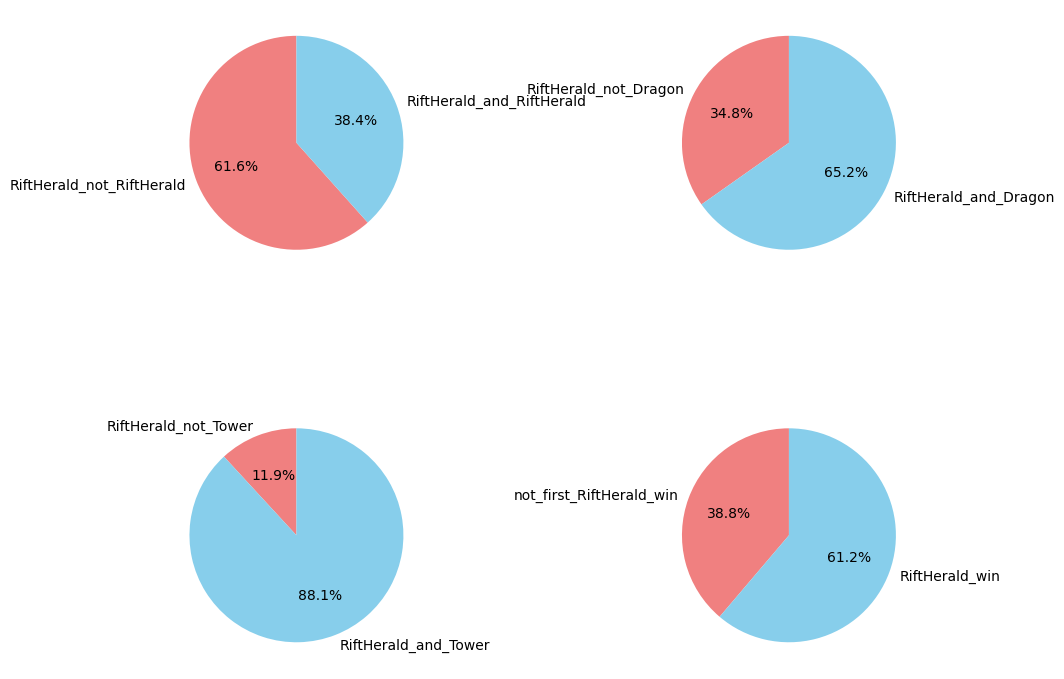

In [8]:
RiftHerald_and_RiftHerald = ((df_winner['firstRiftHerald']==True) & (df_winner['riftHeraldKills']==2)).sum()
RiftHerald_not_RiftHerald = ((df_winner['firstRiftHerald']==True) & (df_winner['riftHeraldKills']!=2)).sum()
RiftHerald_and_Dragon = ((df_winner['firstRiftHerald']==True) & (df_winner['firstDragon']==True)).sum()
RiftHerald_not_Dragon = ((df_winner['firstRiftHerald']==True) & (df_winner['firstDragon']==False)).sum()
RiftHerald_and_Tower = ((df_winner['firstRiftHerald']==True) & (df_winner['firstTower']==True)).sum()
RiftHerald_not_Tower = ((df_winner['firstRiftHerald']==True) & (df_winner['firstTower']==False)).sum()
RiftHerald_win = (df_winner['riftHeraldKills']>=1).sum()
not_RiftHerald_win = (df_winner['riftHeraldKills']==0).sum()

RiftHerald=[RiftHerald_not_RiftHerald, RiftHerald_and_RiftHerald]
RiftHerald_Dragon=[RiftHerald_not_Dragon, RiftHerald_and_Dragon]
RiftHerald_Tower=[RiftHerald_not_Tower, RiftHerald_and_Tower]
RiftHerald_win=[not_RiftHerald_win, RiftHerald_win]

labels_1=['RiftHerald_not_RiftHerald' , 'RiftHerald_and_RiftHerald']
labels_2=['RiftHerald_not_Dragon', 'RiftHerald_and_Dragon']
labels_3=['RiftHerald_not_Tower', 'RiftHerald_and_Tower']
labels_4=['not_first_RiftHerald_win', 'RiftHerald_win']

fig, axes = plt.subplots(2,2, figsize=(10,8))
axes[0, 0].pie(RiftHerald, labels=labels_1, autopct='%.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
axes[0, 1].pie(RiftHerald_Dragon, labels=labels_2, autopct='%.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
axes[1, 0].pie(RiftHerald_Tower, labels=labels_3, autopct='%.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
axes[1, 1].pie(RiftHerald_win, labels=labels_4, autopct='%.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])

plt.tight_layout()
plt.show()

첫 정령을 먹고 두 번째 정령까지 먹을 경우는 <span style='color:blue'>38%</span>, 첫 번째 정령만 먹는 경우는 <span style='color:red'>62%</span>로 첫 정령을 먹보 두 번째 정령까지 먹는 경우는 높지 않은걸 볼 수 있음</br>

첫 정령과 첫 용 모두 먹는 경우 <span style='color:blue'>65%</span>이고 첫 정령은 먹지만 용은 못 먹는 경우는<span style='color:red'>35%</span>가 나온걸 볼 수 있다. 여기서 본인은 주로 정령과 용은 서로 나눠서 먹는다고 생각했지만 첫정령을 먹은 경우 용까지 연결되는 경우가 많다는걸 볼 수 있다.</br>

첫 정령을 먹은 경우 첫 포탑을 가져갈 경우 <span style='color:blue'>88%</span>이고 첫 포탑을 못가져갈 확률은 <span style='color:red'>12%</span>로 위에서 첫 포탑을 가져가는 경우 승률이 높은데 정령을 먹게되면 첫 포탑을 가져갈 확률이 매우 높기때문에 승리와 연결되는 중요한 역할을 한다고 볼 수 있다.

첫 정령을 먹고 승률은 <span style='color:blue'>61%</span> 첫 정령을 먹지 못하고 이길 확률은 <span style='color:red'>39%</span>로 정령을 정령을 먹으면 첫 포탑 깰 확률은 매우 높지만 그 스노우볼이 승리까지 지어지는 경우는 25%이상 낮아지는걸 볼 수있다.